In [1]:
import os, glob, math, operator
import ROOT as ROOT
from ROOT import TCanvas, TColor, TGaxis, TH1F, TPad, TFile, TGraphAsymmErrors,TLatex,TLine,gStyle,TLegend,gROOT,TGraph
from ROOT import kBlack, kBlue, kRed
from array import array
import matplotlib.pyplot as plt, numpy as np
from matplotlib import text
from matplotlib.colors import LogNorm
import datetime
import pandas as pd 

def SetCanvas():
    c = TCanvas("myCanvasName","The Canvas Title",650,600)
    c.SetBottomMargin(0.100)
    c.SetRightMargin(0.020)
    c.SetLeftMargin(0.150)
    c.SetTopMargin(0.080)
    return c

def SetCMSAxis(h, xoffset=1., yoffset=1.):
    h.GetXaxis().SetTitleSize(0.047)
    h.GetYaxis().SetTitleSize(0.047)

    print (type(h))
    if type(h) is ( (not ROOT.TGraphAsymmErrors) or (not ROOT.TGraph)):
        h.GetZaxis().SetTitleSize(0.047)

    h.GetXaxis().SetLabelSize(0.047)
    h.GetYaxis().SetLabelSize(0.047)
    if type(h) is ( (not ROOT.TGraphAsymmErrors) or (not ROOT.TGraph)):
        h.GetZaxis().SetLabelSize(0.047)

    h.GetXaxis().SetTitleOffset(xoffset)
    h.GetYaxis().SetTitleOffset(yoffset)
    return h

def SetLegend(coordinate_=[.50,.65,.90,.90],ncol=2):
    c_=coordinate_
    legend=ROOT.TLegend(c_[0], c_[1],c_[2],c_[3])
    legend.SetBorderSize(0)
    legend.SetNColumns(ncol)
    legend.SetLineColor(1)
    legend.SetLineStyle(1)
    legend.SetLineWidth(1)
    legend.SetFillColor(0)
    legend.SetFillStyle(0)
    legend.SetTextFont(42)
    legend.SetTextSize(0.035)
    return legend


def drawenergy1D(is2017, text_="Work in progress 2018", data=True):
    #pt = ROOT.TPaveText(0.0877181,0.9,0.9580537,0.96,"brNDC")
    pt = ROOT.TPaveText(0.0997181,0.95,0.9580537,0.96,"brNDC")
    pt.SetBorderSize(0)
    pt.SetTextAlign(12)
    pt.SetFillStyle(0)
    pt.SetTextFont(52)

    cmstextSize = 0.07
    preliminarytextfize = cmstextSize * 0.7
    lumitextsize = cmstextSize *0.7
    pt.SetTextSize(cmstextSize)
    text = pt.AddText(0.03,0.57,"#font[60]{CMS}")

    #pt1 = ROOT.TPaveText(0.0877181,0.9,0.9580537,0.96,"brNDC")
    pt1 = ROOT.TPaveText(0.0877181,0.95,0.9580537,0.96,"brNDC")
    pt1.SetBorderSize(0)
    pt1.SetTextAlign(12)
    pt1.SetFillStyle(0)
    pt1.SetTextFont(52)

    pt1.SetTextSize(preliminarytextfize)
    #text1 = pt1.AddText(0.215,0.4,text_)
    text1 = pt1.AddText(0.15,0.4,text_)

    #pt2 = ROOT.TPaveText(0.0877181,0.9,0.9580537,0.96,"brNDC")
    pt2 = ROOT.TPaveText(0.0997181,0.95,0.9580537,0.96,"brNDC")
    pt2.SetBorderSize(0)
    pt2.SetTextAlign(12)
    pt2.SetFillStyle(0)
    pt2.SetTextFont(52)
    pt2.SetTextFont(42)
    pt2.SetTextSize(lumitextsize)

    pavetext = ''
    if is2017 and data: pavetext = str(luminosity_)+' fb^{-1}'+" (13 TeV)"
    if (not is2017) and data: pavetext = str(luminosity_)+' fb^{-1}'+"(13 TeV)"

    if is2017 and not data: pavetext = "13 TeV"
    if (not is2017) and not data: pavetext = "13 TeV"

    if data: text3 = pt2.AddText(0.68,0.5,pavetext)
    if not data: text3 = pt2.AddText(0.85,0.5,pavetext)

    return [pt,pt1,pt2]

def getLatex():
    latex =  TLatex()
    latex.SetNDC();
    latex.SetTextSize(0.04);
    latex.SetTextAlign(31);
    latex.SetTextAlign(11);
    latex.SetTextColor(1);
    return latex


def getGraph(n,x,y,lc,mc,ms):
    gr =TGraph(n,x,y)
    gr.SetFillColor(4)
    #gr.SetFillStyle(3004)
    gr.SetLineColor(4)
    gr.SetLineWidth(2)
    gr.SetMarkerStyle(ms)
    gr.SetMarkerSize(1.5)
    gr.SetLineColor(lc)
    gr.SetLineWidth(1)
    gr.SetMarkerColor(mc)
    gr.GetYaxis().SetTitle("Signal Efficiency")
    gr.GetXaxis().SetTitle("M_{a} (GeV)")
    return gr
    
def getHisto(hist,lc,mc,ms):
    gr = hist
    #gr.SetFillColor(4)
    #gr.SetFillStyle(3004)
    gr.SetLineWidth(2)
    #gr.SetMarkerStyle(ms)
    #gr.SetMarkerSize(1.5)
    gr.SetLineColor(lc)
    #gr.SetMarkerColor(mc)
    return gr

Welcome to JupyROOT 6.22/06


In [2]:
datestr = str(datetime.date.today().strftime("%d%m%Y"))
luminosity_1 = '{0:.2f}'.format(41.5)
luminosity_2 = '{0:.2f}'.format(35.81)

In [3]:
gStyle.SetErrorX(0.5)
gStyle.SetFrameLineWidth(3)
gStyle.SetOptTitle(0)
gStyle.SetOptStat(0)
gStyle.SetLegendBorderSize(0)
gStyle.SetFillColor(2)
gStyle.SetLineWidth(1)
gStyle.SetHistFillStyle(2)
gROOT.SetBatch(True)
sig_plots = {}

ROOT.gStyle.SetOptTitle(0)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetErrorX(0.)
ROOT.gROOT.SetBatch(True)

# file1 = '/Users/ptiwari/cernBox/Documents/analysis_histo_df_signal_2017_Prefire/bbDM_2HDMa_LO_5f_TuneCP3_13TeV_madgraph_pythia8_ma_750_mA_1200.root'
# file2 = '/Users/ptiwari/cernBox/Documents/analysis_histo_df_signal_2017_noPrefire/bbDM_2HDMa_LO_5f_TuneCP3_13TeV_madgraph_pythia8_ma_750_mA_1200.root'

file1 = '/Users/ptiwari/cernBox/Documents/ExoPieCapper/analysis_histo_v17_10_00_00_no_dijetplot_sig_v1/bbDM_2HDMa_LO_5f_TuneCP3_13TeV_madgraph_pythia8_ma_150_mA_600.root'

file2 = '/Users/ptiwari/cernBox/Documents/ExoPieCapper/analysis_histo_v16_07_04_01/bbDM_2HDMa_LO_5f_Ma150_MChi1_MA600_tanb35_sint_0p7_MH_600_MHC_600_TuneCP3_13TeV-madgraph-pythia8.root'

## ma100_mA600
# xsec1 =  0.0257900
# xsec2 = 0.1394

## ma100_mA600
# xsec1 =  0.4232
# xsec2 = 14.85

## ma150_mA600
xsec1 = 0.282800
xsec2 = 5.746000

tfile1 = ROOT.TFile(file1)
tfile2 = ROOT.TFile(file2)

plots ={}
plots_tot ={}
lumi = {}
xsec = {}
plots['2017'] = tfile1.Get('h_reg_SR_2b_MET')
# plots['prefire_down'] = tfile1.Get('h_reg_SR_2b_MET_weightPrefire_up')
# plots['prefire_up'] = tfile1.Get('h_reg_SR_2b_MET_weightPrefire_down')
plots['2016'] = tfile2.Get('h_reg_SR_2b_MET')

plots_tot['2017'] = tfile1.Get('h_total_mcweight')
# plots_tot['prefire_down'] = tfile1.Get('h_total_mcweight')
# plots_tot['prefire_up'] = tfile1.Get('h_total_mcweight')
plots_tot['2016'] = tfile2.Get('h_total_mcweight')

lumi['2017'] = luminosity_1
lumi['2016'] = luminosity_2

xsec['2017'] = xsec1
xsec['2016'] = xsec2

<class cppyy.gbl.TH1F at 0x7fba4d00fbe0>
(float(lumi[key]),xsec[key]),histo.Integral(),plots_tot[key].Integral()
(41.5, 0.2828) 2393.509740829468 95554.0
Scaling Factor: 0.12282269711367395
after scaling histo.Integral() 293.9773190021515
<class cppyy.gbl.TH1F at 0x7fba4d00fbe0>
(float(lumi[key]),xsec[key]),histo.Integral(),plots_tot[key].Integral()
(35.81, 5.746) 122.0257842540741 99968.0
Scaling Factor: 2.0583012564020486
after scaling histo.Integral() 251.16582441329956


Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: pdf file statComp_ma_150_mA_600.pdf has been created
Info in <TCanvas::Print>: png file statComp_ma_150_mA_600.png has been created


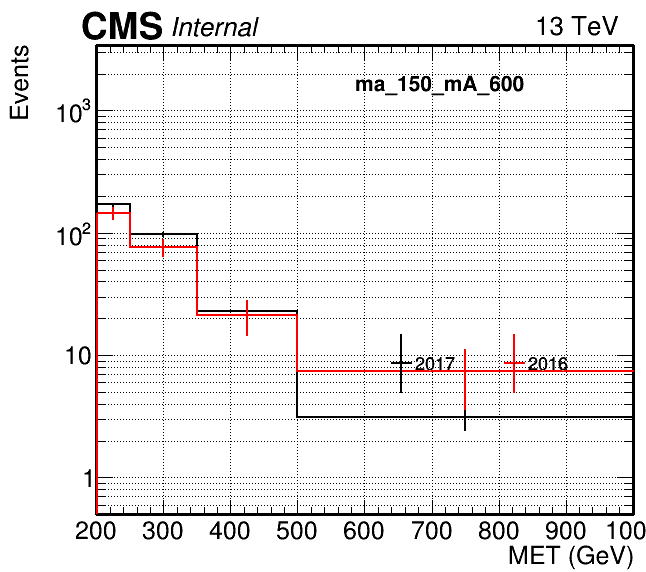

In [4]:
c1 = SetCanvas()
c1.SetTickx()
c1.SetTicky() 
c1.SetGridx()
c1.SetGridy()
c1.SetLogy(1)
c1.cd()
#legend = SetLegend([.65,.45,.85,.80],ncol=1)
legend = SetLegend([.60,.28,.95,.45],ncol=2)
fst_ele = 1
for key in plots: 
    histo = getHisto(plots[key],fst_ele,fst_ele,20+fst_ele)
    histo = SetCMSAxis(histo,1,1.6)
    print ('(float(lumi[key]),xsec[key]),histo.Integral(),plots_tot[key].Integral()')
    print ((float(lumi[key]),xsec[key]),histo.Integral(),plots_tot[key].Integral())
    print('Scaling Factor: '+str((float(lumi[key])*1000*xsec[key])/plots_tot[key].Integral()))
    histo.Scale((float(lumi[key])*1000*xsec[key])/plots_tot[key].Integral())
    print('after scaling histo.Integral()', histo.Integral())
    legend.AddEntry(histo,str(key).replace('_',' '),"PEL")
    fst_ele+=1
    histo.GetYaxis().SetTitle("Events")
    histo.GetXaxis().SetTitle("MET (GeV)")
    histo.Sumw2()
    maxi = histo.GetMaximum()
    histo.SetMaximum(maxi*20)
    histo.SetMinimum(0.5)
    histo.Draw("E hist same")

legend.Draw('L same')
pt = drawenergy1D(True,text_="    Internal",data=False)
for ipt in pt: ipt.Draw()
latex=getLatex()
latex.DrawLatex(0.55, 0.84,file1.partition('_pythia8_')[-1].strip('.root'))

c1.Update()
c1.Draw()
c1.SaveAs('statComp_'+file1.partition('_pythia8_')[-1].strip('.root')+'.pdf')
c1.SaveAs('statComp_'+file1.partition('_pythia8_')[-1].strip('.root')+'.png')
#c1.Close()